In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../')
import utils as u
u.check_python_version()
u.check_virtual_memory()

3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]
Virtual memory usage - total: 31 GB / available: 24 GB / percent used: 21.7 %


In [2]:
# Open a dataset with monthly data
ds = xr.open_dataset(
    'snowc.mon.noaaV2c_185101_201412_2.0x1.75.nc'
)
ds

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192, nbnds: 2, time: 1968)
Coordinates:
  * lat        (lat) float32 88.542 86.6531 84.7532 ... -86.6531 -88.542
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 354.375 356.25 358.125
  * time       (time) datetime64[ns] 1851-01-01 1851-02-01 ... 2014-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    snowc      (time, lat, lon) float32 ...
Attributes:
    Conventions:             CF-1.2
    title:                   4x Daily NOAA-CIRES 20th Century Reanalysis V2c
    platform:                Model
    institution:             NOAA ESRL Physical Sciences Division & CU/CIRES ...
    citation:                Compo,G.P. <http://www.esrl.noaa.gov/psd/people/...
    version:                 2c
    contact:                 esrl.psd.data@noaa.gov
    source:                  20CRv2c 2014, Ensemble Kalman Filter, ocean (spe...
    forcing_note:            Additional information on the exte

In [3]:
# Get the variable and perdiod
da = ds.snowc.sel(time=slice('1984', '2014'))
da

<xarray.DataArray 'snowc' (time: 372, lat: 94, lon: 192)>
[6713856 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * time     (time) datetime64[ns] 1984-01-01 1984-02-01 ... 2014-12-01
Attributes:
    long_name:         Monthly Snow Cover at Surface
    cell_methods:      time: mean (monthly from 3-hourly values)
    units:             %
    precision:         2
    GRIB_id:           238
    GRIB_name:         SNOWC
    var_desc:          snow cover
    dataset:           NOAA-CIRES 20th Century Reanalysis version 2c Monthly ...
    level_desc:        Surface
    statistic:         Ensemble Mean
    parent_stat:       Individual Obs
    standard_name:     
    valid_range:       [  0. 100.]
    statistic_method:  Ensemble mean is calculated by averaging over all 56 e...
    GridType:          Cylindrical Equidistant Projection Grid


## Custom season climatology

In [4]:
# You can choose only a single month with an int
custom_season_clim = u.custom_season_clim(da, 2, calendar='gregorian')
custom_season_clim

<xarray.DataArray (lat: 94, lon: 192)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
    month    int64 2

<IPython.core.display.Javascript object>


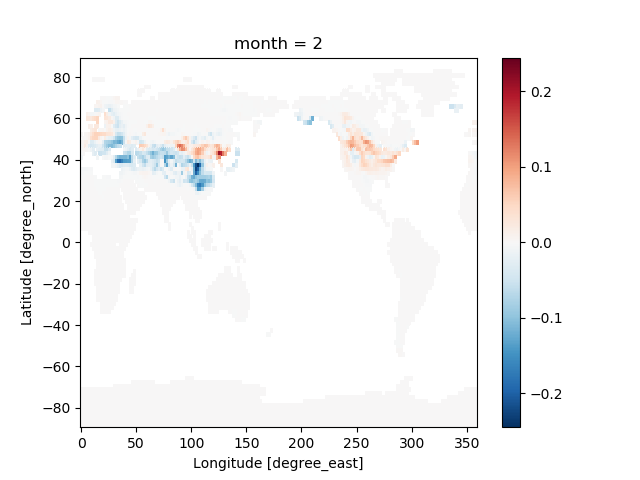

In [5]:
# Ok for all month (delta < 1e-6 exept February due to the month weight)
plt.figure()
(da.groupby('time.month').mean('time', skipna=False).sel(month=2)-custom_season_clim).plot()

In [6]:
# You can choose custom season with a string from 'JFMAMJJASONDJFMAMJJASOND'
custom_season_clim = u.custom_season_clim(da, 'JJA', calendar='gregorian')
custom_season_clim

<xarray.DataArray (lat: 94, lon: 192)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
    season   <U3 'JJA'

<IPython.core.display.Javascript object>


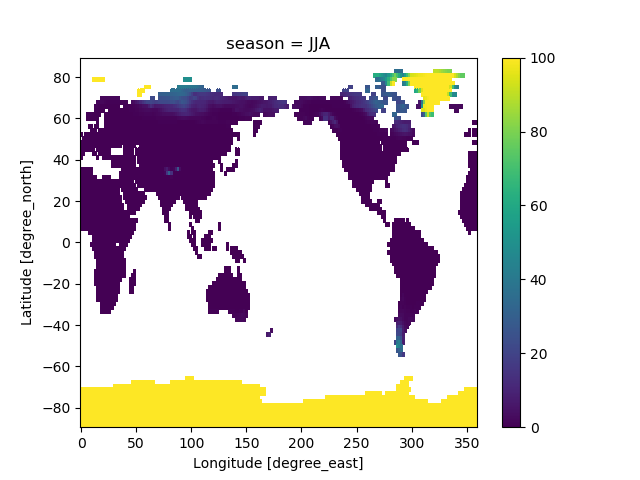

In [7]:
plt.figure()
custom_season_clim.plot()

In [8]:
season_clim = u.season_clim(da, calendar='gregorian')

<IPython.core.display.Javascript object>


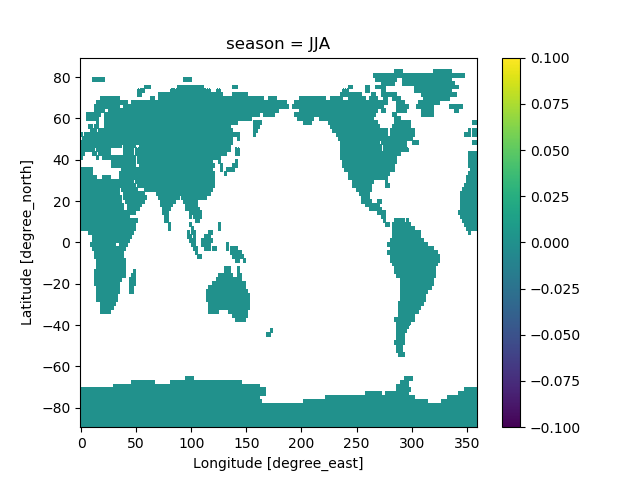

In [9]:
plt.figure()
(custom_season_clim-season_clim.sel(season='JJA')).plot()

# Check with CDO

In [10]:
custom_season_clim = u.custom_season_clim(da, 'DJFM', calendar='gregorian')
custom_season_clim

<xarray.DataArray (lat: 94, lon: 192)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
    season   <U4 'DJFM'

## Select same time period

In [11]:
!cdo selyear,1984/2014 /home/msantola/TP_CLiMAF/ReferenceSNOW/SNC/SNCRefData/snowc.mon.noaaV2c_185101_201412_2.0x1.75.nc snowc.mon.noaaV2c_198401_201412_2.0x1.75.nc


cdo selyear: Open failed on >/home/msantola/TP_CLiMAF/ReferenceSNOW/SNC/SNCRefData/snowc.mon.noaaV2c_185101_201412_2.0x1.75.nc<
No such file or directory


In [12]:
da_cdo = xr.open_dataset('snowc.mon.noaaV2c_198401_201412_2.0x1.75.nc').snowc
da_cdo

<xarray.DataArray 'snowc' (time: 372, lat: 94, lon: 192)>
[6713856 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1984-01-01 1984-02-01 ... 2014-12-01
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
Attributes:
    long_name:         Monthly Snow Cover at Surface
    units:             %
    cell_methods:      time: mean (monthly from 3-hourly values)
    precision:         2
    GRIB_id:           238
    GRIB_name:         SNOWC
    var_desc:          snow cover
    dataset:           NOAA-CIRES 20th Century Reanalysis version 2c Monthly ...
    level_desc:        Surface
    statistic:         Ensemble Mean
    parent_stat:       Individual Obs
    standard_name:     
    statistic_method:  Ensemble mean is calculated by averaging over all 56 e...
    GridType:          Cylindrical Equidistant Projection Grid
    datum:             wgs84
    ac

### Equivalent with timmean -selmonth

In [13]:
!cdo timmean -selmonth,'1,2,3,12' snowc.mon.noaaV2c_198401_201412_2.0x1.75.nc snowc.DJFM_timmean_selmonth.noaaV2c_198401_201412_2.0x1.75.nc

cdo(2) selmonth: Process started
Warning (cdfDefVar): Changed double entry of variable name 'time_bnds' to 'time_bnds_2'!
cdo(2) selmonth: Processed 2238200 values from 2 variables over 372 timesteps
cdo timmean: Processed 2238200 values from 2 variables [0.03s 58MB]


In [14]:
timmean_selmonth = xr.open_dataset('snowc.DJFM_timmean_selmonth.noaaV2c_198401_201412_2.0x1.75.nc').snowc
timmean_selmonth

<xarray.DataArray 'snowc' (time: 1, lat: 94, lon: 192)>
array([[[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ...,
        [100., 100., ..., 100., 100.],
        [100., 100., ..., 100., 100.]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1999-02-15
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
Attributes:
    long_name:         Monthly Snow Cover at Surface
    units:             %
    cell_methods:      time: mean (monthly from 3-hourly values)
    precision:         2
    GRIB_id:           238
    GRIB_name:         SNOWC
    var_desc:          snow cover
    dataset:           NOAA-CIRES 20th Century Reanalysis version 2c Monthly ...
    level_desc:        Surface
    statistic:         Ensemble Mean
    parent_stat:       Individual Obs
    standard_name:     
    statistic_method:  Ensemble mean is calculated by ave

In [15]:
test = custom_season_clim.copy()
test.values = timmean_selmonth[0].values
test

<xarray.DataArray (lat: 94, lon: 192)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
    season   <U4 'DJFM'

<IPython.core.display.Javascript object>


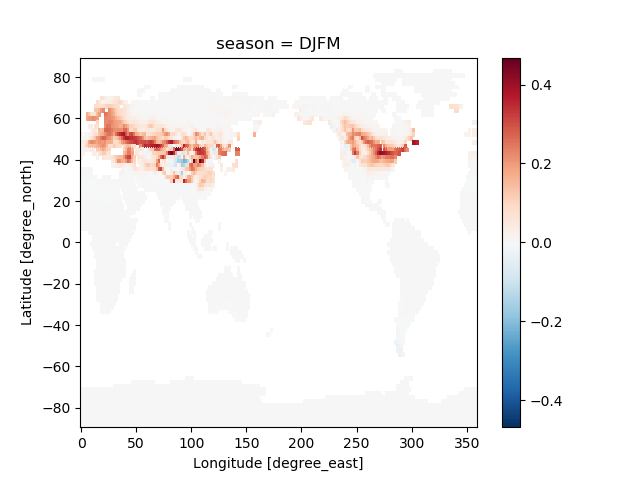

In [16]:
plt.figure()
(test-custom_season_clim).plot()

Ok differences are due to CDO that do not take into account monthly weighted averages